# ST-Gear

ST-Gear is a strong 3D reconstruction tool for Spatial Transcriptomics, with accurate position alignment plus distortion correction!

ST-GEARS consists of methods to compute anchors, to rigidly align and to elastically registrate sections. Specifically,

1. `st_gears` the main method which computes mappings between adjacent sections in serial, using Fused-Gromov Wasserstein Optimal Transport with our innovatie Distributive Constraints.
    
2. `stack_slices_pairwise_rigid` rigidly aligns sections using Procrustes Analysis.
    
3. `stack_slices_pairwise_elas_field` eliminates distorsions through Gaussian Smoothed Elastic Fields. Validity is proved mathematically.

This function can be ran on GPU, if you want to use GPU, you need to create enviroment according to the guide [Clustering_by_GPU](../Tutorials/Clustering_by_GPU.html).

Before anlysing, you also need to install a necessary package: **torch**

        CPU: pip install torch==1.10.0

        GPU: pip install torch==1.10.0+cu113 --extra-index-url https://download.pytorch.org/whl/

In [1]:
import stereo as st
from stereo.core.ms_data import MSData
from natsort import natsorted
from glob import glob

## Reading Data

In [2]:
data_dir = '../../data/mouse_brain/'
files_list = natsorted(glob(f'{data_dir}/*.h5ad'))
data_list = [st.io.read_h5ad(path) for path in files_list]
ms_data = MSData(_data_list=data_list)
ms_data

ms_data: {'0': (805, 114), '1': (1051, 114), '2': (1188, 114), '3': (1206, 114), '4': (1448, 114), '5': (1487, 114), '6': (1584, 114), '7': (1652, 114), '8': (1748, 114), '9': (1766, 114), '10': (1649, 114), '11': (1667, 114), '12': (1783, 114), '13': (1730, 114), '14': (1810, 114), '15': (1812, 114), '16': (1680, 114), '17': (1692, 114), '18': (1586, 114), '19': (1634, 114), '20': (1604, 114), '21': (1531, 114), '22': (1527, 114), '23': (1676, 114), '24': (1399, 114), '25': (1388, 114), '26': (1221, 114), '27': (1149, 114), '28': (1163, 114), '29': (1172, 114), '30': (1023, 114), '31': (943, 114), '32': (847, 114), '33': (754, 114), '34': (751, 114), '35': (620, 114), '36': (629, 114), '37': (594, 114), '38': (509, 114), '39': (441, 114)}
num_slice: 40
names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39'

## Showing the spatial distribution of cells type.

Here we take slice 8 to slice 11 as example.

We can see the last two slices are not aligned with first two slices.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

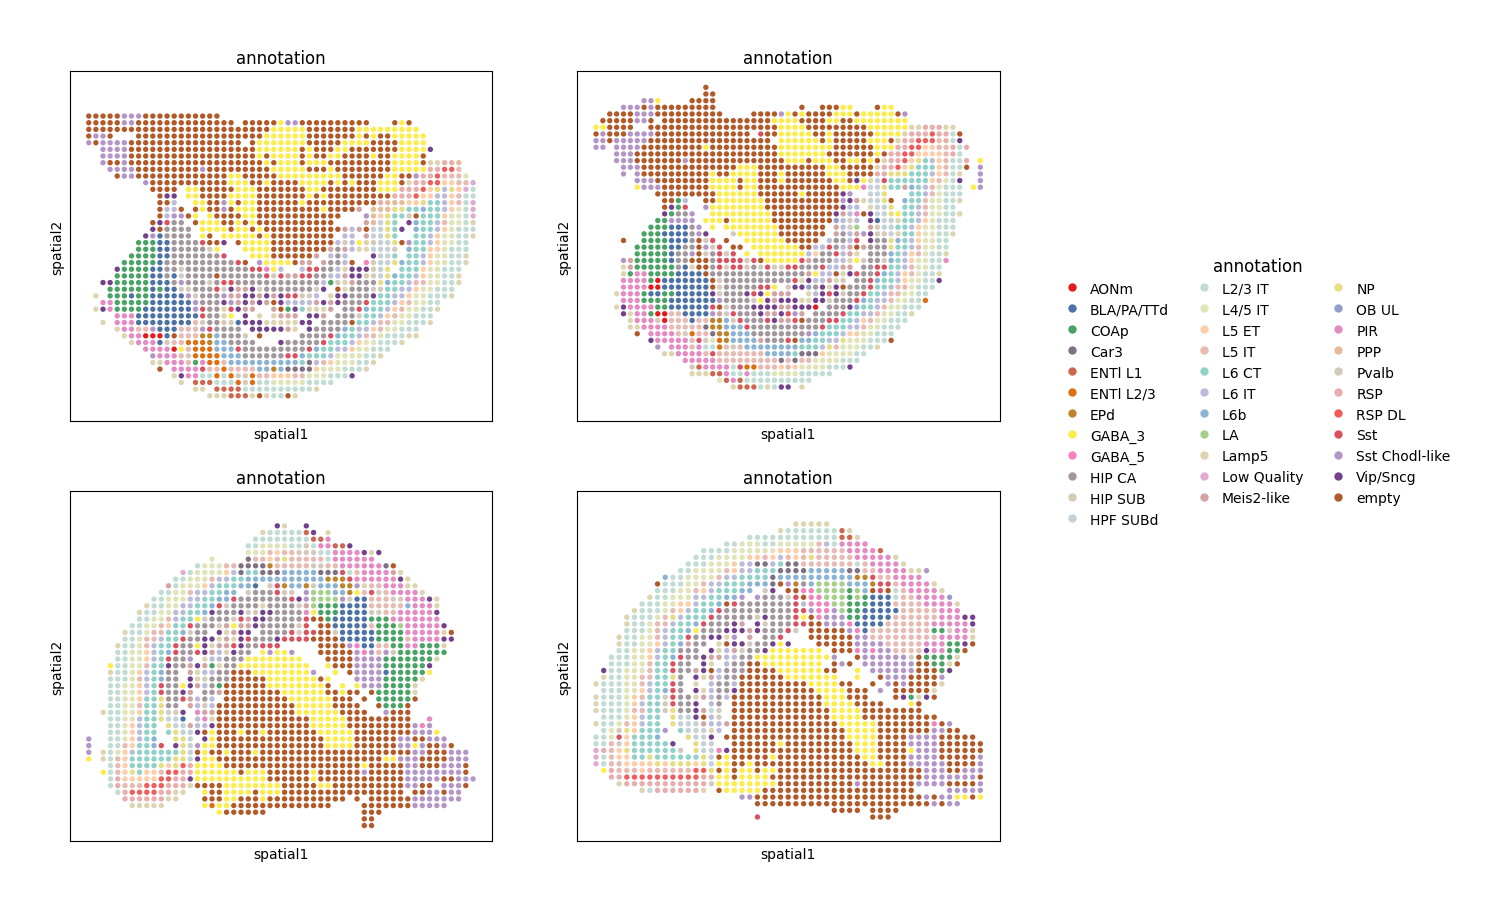

In [3]:
ms_data[8:12].plt.ms_spatial_scatter(
    color_by='cluster',
    color_key='annotation',
    ncols=2
)

## Running ST-Gears

`start_i` and `end_i` are specify calculating scope of slices, here is means to calculate slice 8 to slice 11.

More details refer to [ms_data.tl.st_gears](../content/stereo.algorithm.st_gears.StGears.main.html).

In [4]:
st_gears_ins = ms_data.tl.st_gears(
    cluster_res_key='annotation',
    start_i=8,
    end_i=11,
    tune_alpha_li=[0.8, 0.4, 0.2, 0.1, 0.05, 0.025, 0.013, 0.006],
    numItermax=200,
    dissimilarity_val='kl',
    dissimilarity_weight_val='kl',
    uniform_weight=True,
    map_method_dis2wei='logistic',
    filter_by_label=True,
    use_gpu=False, # set to True to run on GPU
    verbose=False
)

2024-05-21 17:22:29.602807: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /root/miniforge3/envs/stereopy/lib/python3.8/site-packages/cv2/../../lib64:
2024-05-21 17:22:29.602850: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-21 17:22:30.396780: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /root/miniforge3/envs/stereopy/lib/python3.8/site-packages/cv2/../../lib64:
2024-05-21 17:22:30.396820: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-21 17:22:30.396834: I tensorflow/stream_executor/cuda/cuda_diagnostics.

## Rigidly aligning sections using Procrustes Analysis.

Setting `set_as_position` as True to use the rigidly aligned coordinates as the cells/bins position.

More details refer to [st_gears_ins.stack_slices_pairwise_rigid](../content/stereo.algorithm.st_gears.StGears.stack_slices_pairwise_rigid.html).

In [5]:
st_gears_ins.stack_slices_pairwise_rigid(set_as_position=True)

## Showing the spatial distribution of cells type after aligning.

We can see the last two slices have been aligned to the first two slices.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

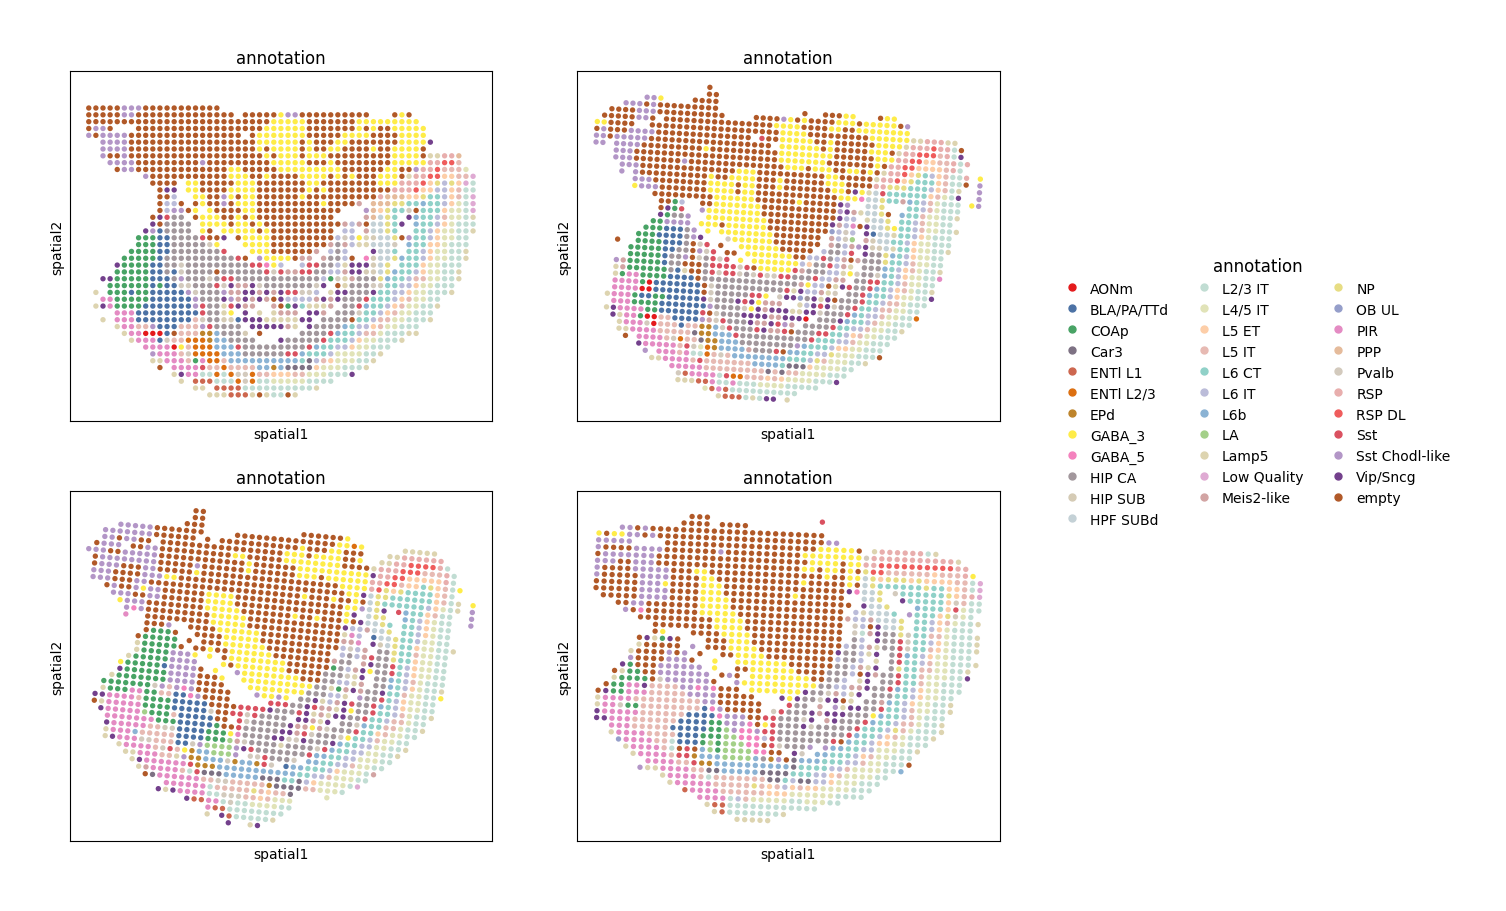

In [6]:
ms_data[8:12].plt.ms_spatial_scatter(
    color_by='cluster',
    color_key='annotation',
    ncols=2
)

## Eliminating distorsions through Gaussian Smoothed Elastic Fields

Setting `set_as_position` as True to use the coordinates eliminated distorsions as the cells/bins position.

More details refer to [st_gears_ins.stack_slices_pairwise_elas_field](../content/stereo.algorithm.st_gears.StGears.stack_slices_pairwise_elas_field.html).

This method can not be ran after running method `stack_slices_pairwise_rigid`.

In [7]:
st_gears_ins.stack_slices_pairwise_elas_field(pixel_size=200, set_as_position=True)

## Showing the spatial distribution of cells type after eliminating distorsions.

We can see the last two slices have been aligned to the first two slices.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

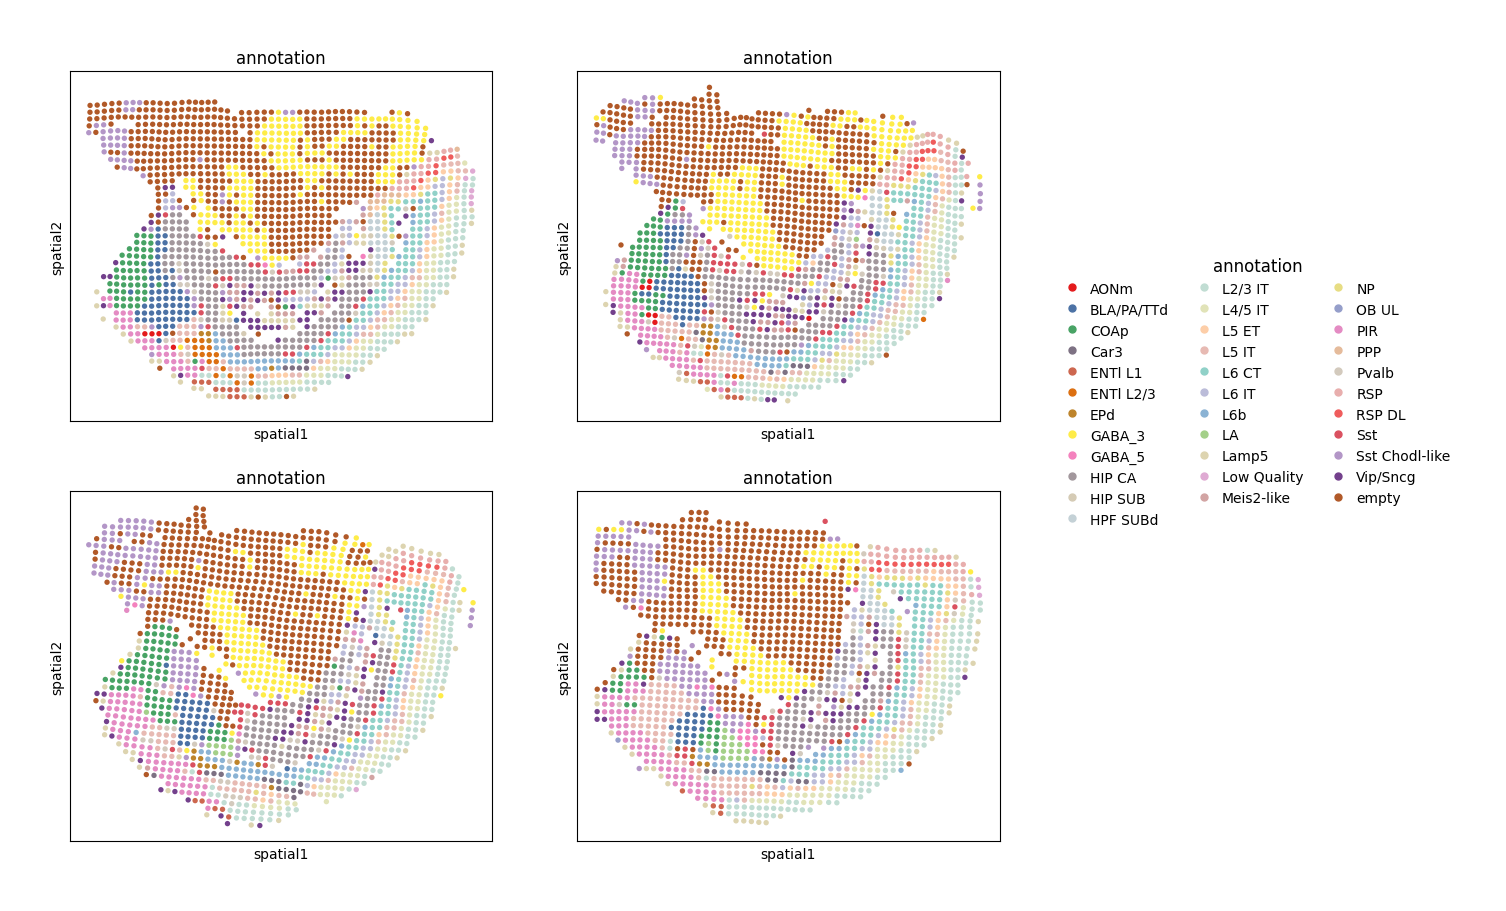

In [8]:
ms_data[8:12].plt.ms_spatial_scatter(
    color_by='cluster',
    color_key='annotation',
    ncols=2
)